In [1]:
import numpy as np
import pandas as pd
import utils
from scipy import signal 
import matplotlib.pyplot as plt
import os

Accelerometer format: Time (s), X (m/s^2), Y (m/s^2), Z (m/s^2) \
Gyroscope format: Time (s), X (rad/s), Y (rad/s), Z (rad/s)

In [12]:
# load csv data as pandas dataframe

filename_acc = 'data/gebaeude64/Accelerometer.csv'
filename_gyro = 'data/gebaeude64/Gyroscope.csv'

acc_df = pd.read_csv(filename_acc, sep=',',header=0)
gyro_df = pd.read_csv(filename_gyro, sep=',',header=0)
gyro_df

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.078031,-0.718033,-1.708740,-0.397789
1,0.088044,-0.631398,-2.251459,-0.248851
2,0.098058,-0.450606,-2.804614,-0.061312
3,0.108071,-0.190664,-3.302476,0.026516
4,0.118084,0.209896,-3.580319,-0.070691
...,...,...,...,...
19037,190.710447,-0.033338,0.009451,-0.051230
19038,190.720462,0.001493,-0.026932,-0.050685
19039,190.730476,0.028527,-0.054808,-0.046541
19040,190.740490,0.035087,-0.050285,-0.043755


In [14]:
# dataframe to numpy array

acc = np.asarray([
    acc_df['Time (s)'].to_numpy(dtype=float),
    acc_df['X (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Y (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Z (m/s^2)'].to_numpy(dtype=float)
])
gyro = np.asarray([
    gyro_df['Time (s)'].to_numpy(dtype=float),
    gyro_df['X (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Y (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Z (rad/s)'].to_numpy(dtype=float)
])

gyro

array([[ 7.80310417e-02,  8.80440417e-02,  9.80580417e-02, ...,
         1.90730476e+02,  1.90740490e+02,  1.90750504e+02],
       [-7.18033314e-01, -6.31398320e-01, -4.50606495e-01, ...,
         2.85269730e-02,  3.50868702e-02,  2.65262555e-02],
       [-1.70873988e+00, -2.25145865e+00, -2.80461359e+00, ...,
        -5.48075773e-02, -5.02847321e-02, -2.59835254e-02],
       [-3.97788644e-01, -2.48851240e-01, -6.13117069e-02, ...,
        -4.65408899e-02, -4.37554903e-02, -3.92899811e-02]])

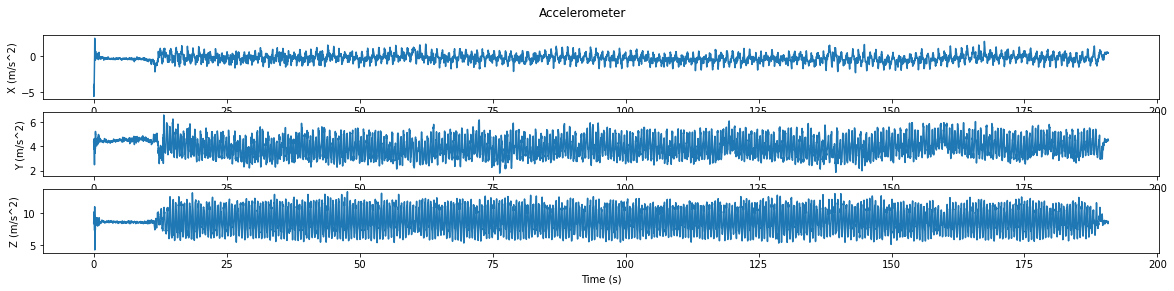

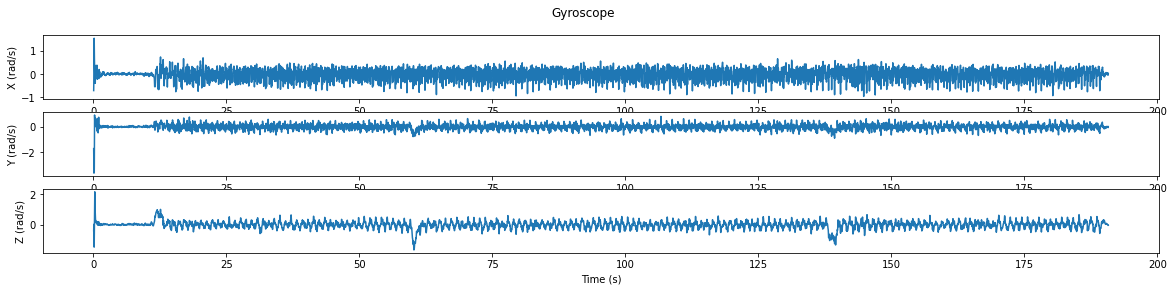

In [15]:
utils.plot_acc(acc, 'all')
utils.plot_gyro(gyro, 'all')

In [16]:
# norm of accelerometer & gyroscope

acc_norm = np.linalg.norm(acc[1::], axis=0)
acc_norm = np.array([acc[0], acc_norm])
gyro_norm = np.linalg.norm(gyro[1::], axis=0)
gyro_norm = np.array([gyro[0], gyro_norm])


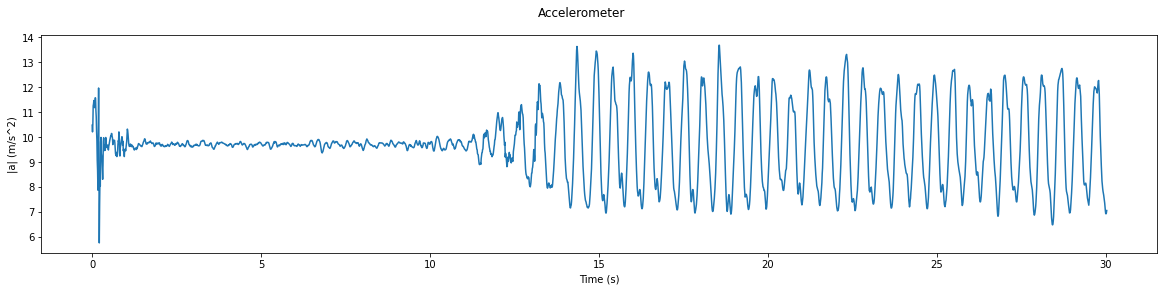

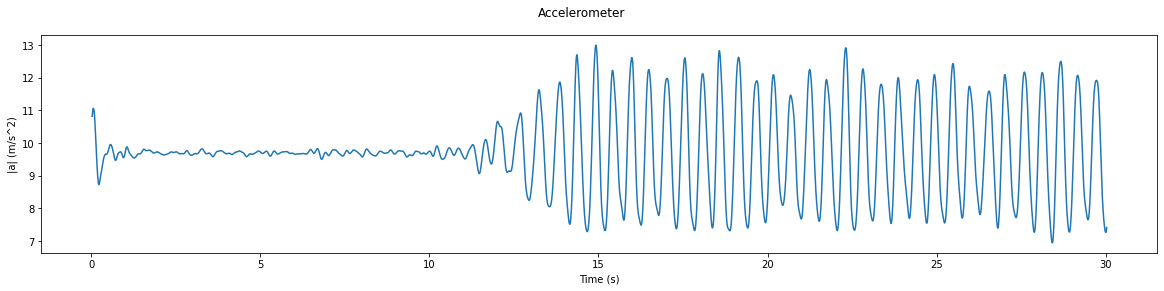

In [17]:
# filter signals with weighed moving average filter

filtered_acc = utils.weighted_moving_average(acc_norm, dim=1, wl=21)
filtered_gyro = utils.weighted_moving_average(gyro_norm, dim=1, wl=21)

utils.plot_acc(acc_norm[0:3000, 0:3000], type='norm')
utils.plot_acc(filtered_acc[0:3000, 0:3000], type='norm')


In [18]:
# save to folder

filename = os.path.basename(os.path.dirname(filename_acc))

np.save("preprocessed_data/" + filename + "_acc.npy", filtered_acc)
np.save("preprocessed_data/" + filename + "_gyro.npy", filtered_gyro)